In [ ]:
from google.colab import files

uploaded_files = files.upload()


Saving myData.zip to myData.zip


In [ ]:
import zipfile

!unzip /content/myData.zip


Streaming output truncated to the last 5000 lines.
 extracting: myData/5/5_13244_1577672002.0758326.png  
 extracting: myData/5/5_13245_1577672002.0768187.png  
 extracting: myData/5/5_13246_1577672002.0768187.png  
 extracting: myData/5/5_13247_1577672002.0778143.png  
 extracting: myData/5/5_13248_1577672002.078812.png  
 extracting: myData/5/5_13249_1577672002.0798092.png  
 extracting: myData/5/5_13250_1577672002.0798092.png  
 extracting: myData/5/5_13251_1577672002.0808067.png  
 extracting: myData/5/5_13252_1577672002.0818043.png  
 extracting: myData/5/5_13253_1577672002.082801.png  
 extracting: myData/5/5_13254_1577672002.082801.png  
 extracting: myData/5/5_13255_1577672002.0837986.png  
 extracting: myData/5/5_13256_1577672002.084796.png  
 extracting: myData/5/5_13257_1577672002.0857933.png  
 extracting: myData/5/5_13258_1577672002.0857933.png  
 extracting: myData/5/5_13259_1577672002.0867918.png  
 extracting: myData/5/5_13260_1577672002.0877888.png  
 extracting: myDat

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
path = "myData"
labelFile = 'labels.csv'  # class names
batch_size_val = 50
steps_per_epoch_val = 2000
epochs_val = 30
imageDimesions = (32, 32, 3)
testRatio = 0.2
validationRatio = 0.2


IMPORTING DATASETS


In [ ]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

# X_train = Array of images to be trained
# y_train = class ID

# checking if no images matches the no of labels in each dataset
print("Data Shapes")
print("Train", end="");
print(X_train.shape, y_train.shape)
print("Validation", end="");
print(X_validation.shape, y_validation.shape)
print("Test", end="");
print(X_test.shape, y_test.shape)

assert (X_train.shape[0] == y_train.shape[
    0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0] == y_validation.shape[
    0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0] == y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:] == (imageDimesions)), " The dimesions of the Training images are wrong "
assert (X_validation.shape[1:] == (imageDimesions)), " The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:] == (imageDimesions)), " The dimesionas of the Test images are wrong"

#Reading the csv file containing the labels
data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))



Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)
data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


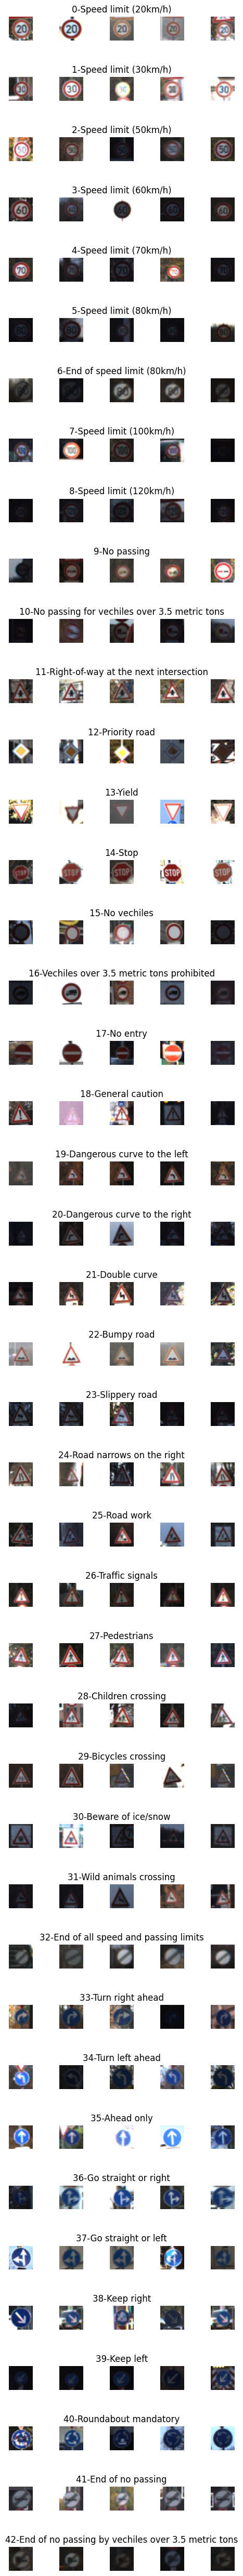

In [ ]:
#Displaying samples from each class
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))


[129, 1236, 1299, 811, 1147, 1051, 245, 840, 778, 840, 1154, 747, 1229, 1232, 435, 333, 231, 634, 682, 106, 199, 173, 191, 294, 168, 855, 337, 138, 314, 162, 249, 450, 125, 370, 221, 702, 218, 111, 1205, 171, 183, 138, 138]


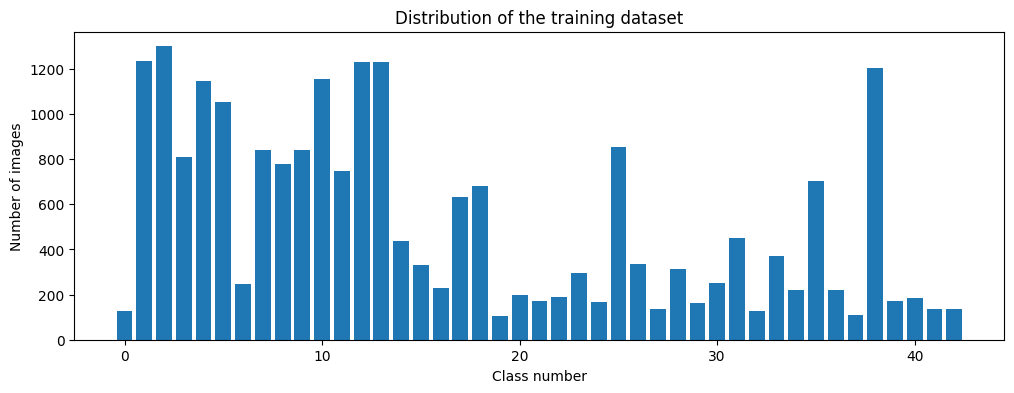

In [ ]:
#Histogram showing the no of samples in each class
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


DATA PREPROCESSING

(32, 32, 3)
38


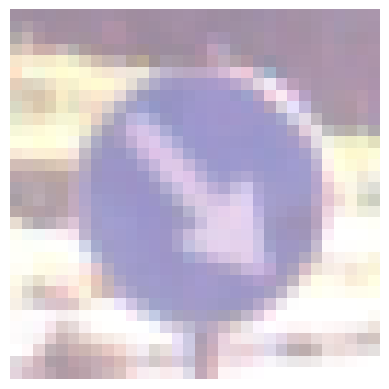

In [ ]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

In [ ]:
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

(32, 32)


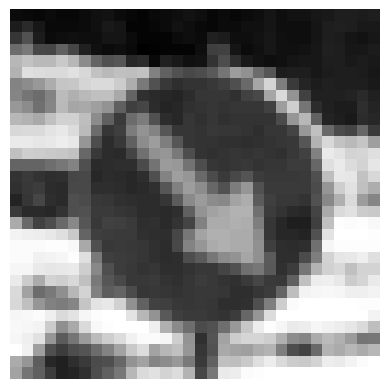

In [ ]:
img = grayscale(X_train[1000])
plt.imshow(img, cmap = 'gray')
print(img.shape)

(32, 32)


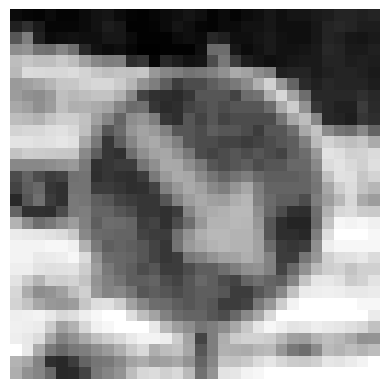

In [ ]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

img = equalize(img)
plt.imshow(img, cmap = 'gray')
plt.axis('off')
print(img.shape)

In [ ]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

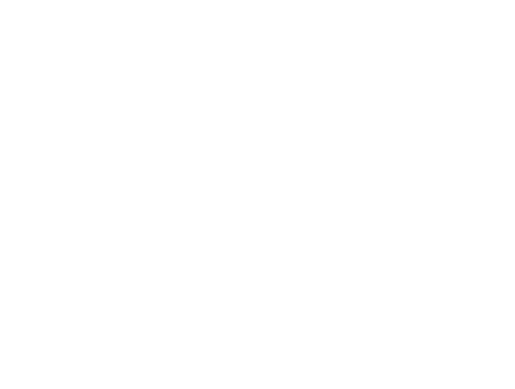

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))  #preprocessing all images
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

DATA AUGMENTAION

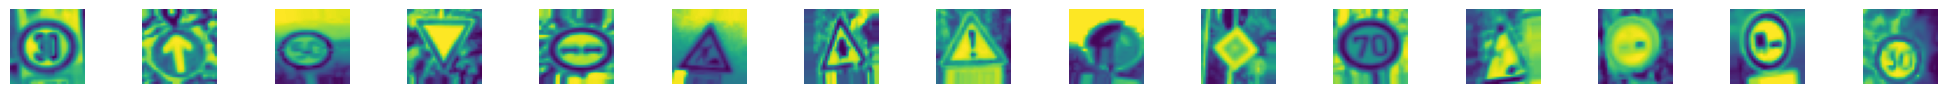

In [ ]:
#Adding a depth of 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,
                       batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)

# Samples of augmented images
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)




CNN MODEL

In [ ]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5)
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)
    no_Of_Nodes = 500
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))

    #compiling the model
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model


#training
model = myModel()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


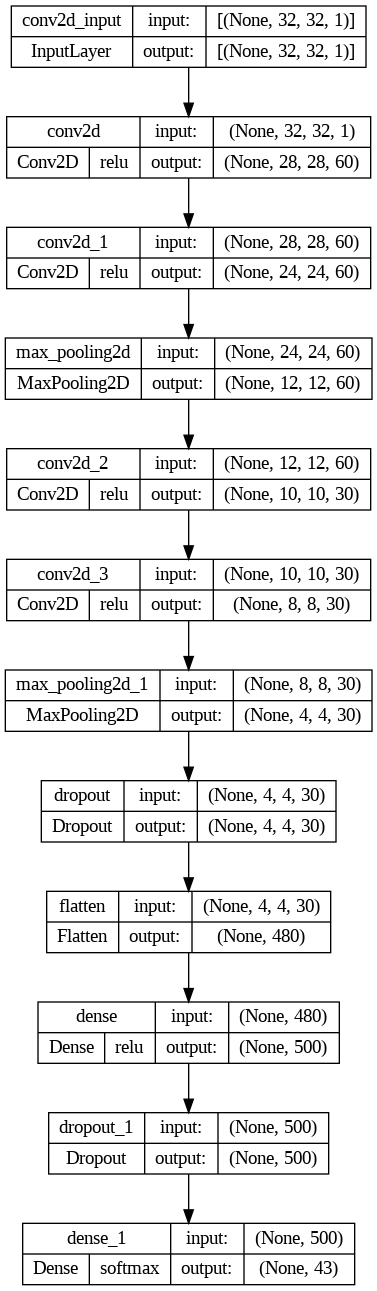

In [ ]:
tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
history=model.fit(X_train,y_train,epochs=10, validation_data=(X_validation,y_validation))



Epoch 1/10
696/696 [==============================] - 282s 403ms/step - loss: 1.2932 - accuracy: 0.6345 - val_loss: 0.2124 - val_accuracy: 0.9463
Epoch 2/10
696/696 [==============================] - 255s 367ms/step - loss: 0.3766 - accuracy: 0.8841 - val_loss: 0.1170 - val_accuracy: 0.9698
Epoch 3/10
696/696 [==============================] - 278s 400ms/step - loss: 0.2548 - accuracy: 0.9216 - val_loss: 0.0801 - val_accuracy: 0.9801
Epoch 4/10
696/696 [==============================] - 287s 412ms/step - loss: 0.1918 - accuracy: 0.9403 - val_loss: 0.0818 - val_accuracy: 0.9774
Epoch 5/10
696/696 [==============================] - 286s 410ms/step - loss: 0.1784 - accuracy: 0.9437 - val_loss: 0.0580 - val_accuracy: 0.9846
Epoch 6/10
696/696 [==============================] - 274s 394ms/step - loss: 0.1472 - accuracy: 0.9551 - val_loss: 0.0568 - val_accuracy: 0.9837
Epoch 7/10
696/696 [==============================] - 282s 406ms/step - loss: 0.1327 - accuracy: 0.9574 - val_loss: 0.0470 -

EVALUATION

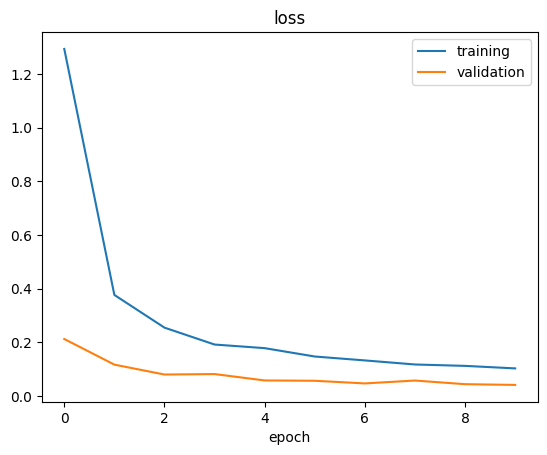

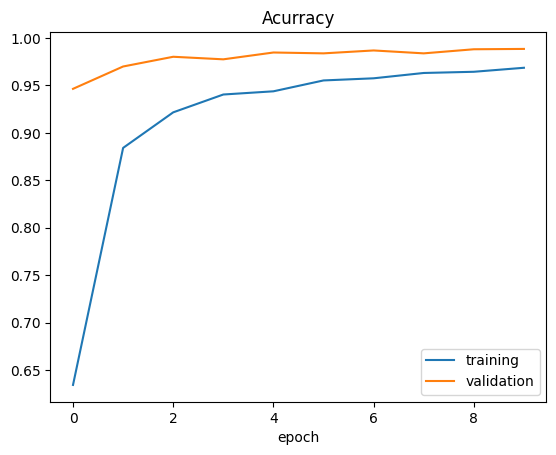

Test Score: 0.03978244587779045
Test Accuracy: 0.9887930750846863


-1

In [ ]:

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])
model.save('trained_model.h5')
# Storing model as a pickle file
pickle_out = open("model_trained.p", "wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()
cv2.waitKey(0)

TESTING THE MODEL

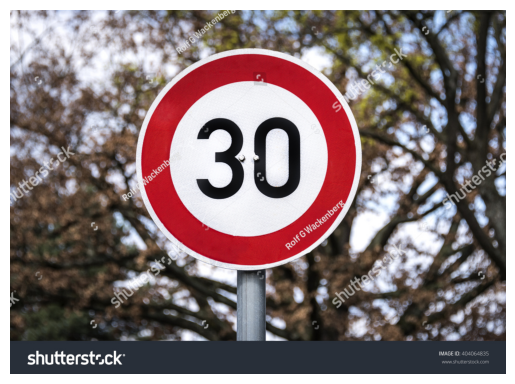

In [ ]:
import requests
from PIL import Image
url = 'https://www.shutterstock.com/shutterstock/photos/404064835/display_1500/stock-photo-germany-german-traffic-sign-with-speed-limit-kilometers-concept-traffic-velocity-speed-rate-404064835.jpg'
r = requests.get(url, stream=True)
image = Image.open(r.raw)
plt.axis('off')
plt.imshow(image, cmap=plt.get_cmap('gray'))

(32, 32)


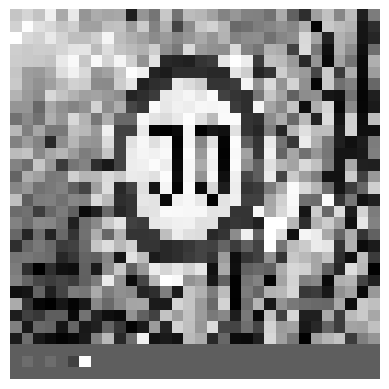

In [ ]:
img = np.asarray(image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)

In [ ]:
threshold = 0.50         # PROBABLITY THRESHOLD
predictions = model.predict(img)
classIndex = np.argmax(predictions,axis=1)
probabilityValue =np.amax(predictions)
print("Probability value",probabilityValue)
def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'


if probabilityValue > threshold:
   print(getClassName(classIndex))
   plt.imshow(image, cmap=plt.get_cmap('gray'))


1/1 [==============================] - 0s 26ms/step
Probability value 0.13994583
